# Using `edgartools`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from edgar import Company, set_identity
from edgar.xbrl import XBRLS

set_identity("rohilpal9763@gmail.com")  # Replace with your email


In [21]:
ticker = "AAPL"

company = Company(ticker)

filings = company.get_filings(form="10-K")

print (filings)

╭──────────────────────────────────────── Filings for Apple Inc. [320193] ────────────────────────────────────────╮
│                                                                                                                 │
│                                                                              Filing                             │
│    Form        Description                                                   Date         Accession Number      │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│    10-K        Annual report for public companies                            2024-11-01   0000320193-24-0001…   │
│    10-K        Annual report for public companies                            2023-11-03   0000320193-23-0001…   │
│    10-K        Annual report for public companies                            2022-10-28   0000320193-22-0001…   │
│    10-K        Annual report for public companies                     

In [ ]:
filings[0].html

╭─────────────────── Form 10-K Apple Inc. [320193]  ────────────────────╮
│                                                                       │
│   Accession Number       Filing Date   Period of Report   Documents   │
│  ───────────────────────────────────────────────────────────────────  │
│   0000320193-24-000123   2024-11-01    2024-09-28         102         │
│                                                                       │
│                                                                       │
╰───────────────── Annual report for public companies ──────────────────╯

In [31]:
filings[0].search("Revenue")

                                              Searching for 'Revenue'                                              
  ╭───────────────────────────────────────────────────── 0 ─────────────────────────────────────────────────────╮  
  │ (1)Services net sales include amortization of the deferred value of services bundled in the sales price of  │  
  │ certain products. Total net sales include $7.7 billion of revenue recognized in 2024 that was included in   │  
  │ deferred revenue as of September 30, 2023, $8.2 billion of revenue recognized in 2023 that was included in  │  
  │ deferred revenue as of September 24, 2022, and $7.5 billion of revenue recognized in 2022 that was included │  
  │ in deferred revenue as of September 25, 2021.                                                               │  
  │                                                                                                             │  
  │ ────────────────────────────────────────────────────────────────────

In [32]:
filings[0].attachments

                                                       Attachments                                                 
                                                                                                                   
  Seq   Document                        Description                                                    Type        
 ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  1     aapl-20240928.htm               10-K                                                           📜  10-K    
  2     a10-kexhibit4109282024.htm      EX-4.1                                                         📋  EX-4.1  
  3     a10-kexhibit10199282024.htm     EX-10.19                                                       📋  EX-10.19
  4     a10-kexhibit10209282024.htm     EX-10.20                                                       📋  EX-10.20
  5     a10-kexhibit10219282024.htm     EX-10.21                            

In [33]:
company

╭────────────────────────────────────────────── 🏢 Apple Inc. AAPL ───────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ ╭───────────────────────────────────────────────── 📋 Entity ─────────────────────────────────────────────────╮ │
│ │                                                                                                             │ │
│ │   CIK   320193   Type   Operating   ○                                                                       │ │
│ │                                                                                                             │ │
│ │                                                                                                             │ │
│ │   Category                  Industry                     Fiscal Year E

In [36]:
company.get_financials()

╭───────────────────────────────────────────────── XBRL Document ─────────────────────────────────────────────────╮
│            Entity Information                                                                                   │
│                                                                                                                 │
│   Property                   Value                                                                              │
│  ───────────────────────────────────────                                                                        │
│   entity_name                Apple Inc.                                                                         │
│   ticker                     AAPL                                                                               │
│   identifier                 320193                                                                             │
│   document_type              10-K                                     

In [41]:
financials = company.get_financials()
balance_sheet = financials.balance_sheet()
income_statement = financials.income_statement()


In [42]:
balance_sheet

                    Consolidated Balance Sheets (Standardized)                     
  Fiscal Year Ended (In millions, except shares in thousands and per share data)   
                                                                                   
                                                      Sep 28, 2024   Sep 30, 2023  
 ───────────────────────────────────────────────────────────────────────────────── 
    ASSETS:                                                                        
      Current assets:                                                              
        Cash and Cash Equivalents                          $29,943        $29,965  
        Current Marketable Securities                      $35,228        $31,590  
        Accounts Receivable                                $33,410        $29,508  
        Vendor non-trade receivables                       $32,833        $31,477  
        Inventory                                           $7,286         $

In [43]:
income_statement

                          Consolidated Statement of Income (Standardized)                           
              Year Ended (In millions, except shares in thousands and per share data)               
                                                                                                    
                                                        Sep 28, 2024   Sep 30, 2023   Sep 24, 2022  
 ────────────────────────────────────────────────────────────────────────────────────────────────── 
        Contract Revenue                                    $391,035       $383,285       $394,328  
        Cost of Goods and Services Sold                   $(210,352)     $(214,137)     $(223,546)  
        Gross Profit                                        $180,683       $169,148       $170,782  
        Operating expenses:                                                                         
          Research and Development Expense                   $31,370        $29,915        

In [44]:
cashflow = financials.cashflow_statement()
cashflow

                                Consolidated Statement of Cash Flows (Standardized)                                
                            Year Ended (In millions, except shares and per share data)                             
                                                                                                                   
                                                                       Sep 28, 2024   Sep 30, 2023   Sep 24, 2022  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
    Cash, cash equivalents, and restricted cash and cash                                                           
  equivalents, ending balances                                                                                     
    Operating activities:                                                                                          
      Net Income                                                        

In [3]:
def get_income_data(ticker: str, n: int = 5):
    c = Company(ticker)
    all_10q_filings = c.get_filings(form="10-K")
    print (f"Total number of 10-K filings of {c.name} so far: {len(all_10q_filings)}")

    latest_filings = all_10q_filings.latest(n)
    print (latest_filings)

    xbs = XBRLS.from_filings(latest_filings)
    print (xbs)

    income_statement = xbs.statements.income_statement()
    income_df = income_statement.to_dataframe()

    return income_df, income_statement, c


income_df_company_1, income_statement_company_1, company_1 = get_income_data(ticker='NVDA')

income_df_company_2, income_statement_company_2, company_2 = get_income_data(ticker='AAPL', n=10)


Total number of 10-K filings of NVIDIA CORP so far: 26


╭─────────────────────────────────────── Filings for NVIDIA CORP [1045810] ───────────────────────────────────────╮
│                                                                                                                 │
│                                                                              Filing                             │
│    Form        Description                                                   Date         Accession Number      │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│    10-K        Annual report for public companies                            2025-02-26   0001045810-25-0000…   │
│    10-K        Annual report for public companies                            2024-02-21   0001045810-24-0000…   │
│    10-K        Annual report for public companies                            2023-02-24   0001045810-23-0000…   │
│    10-K        Annual report for public companies                     

╭──────────────────────────────────────── Filings for Apple Inc. [320193] ────────────────────────────────────────╮
│                                                                                                                 │
│                                                                              Filing                             │
│    Form        Description                                                   Date         Accession Number      │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│    10-K        Annual report for public companies                            2024-11-01   0000320193-24-0001…   │
│    10-K        Annual report for public companies                            2023-11-03   0000320193-23-0001…   │
│    10-K        Annual report for public companies                            2022-10-28   0000320193-22-0001…   │
│    10-K        Annual report for public companies                     

In [4]:
income_statement_company_1

                           CONSOLIDATED INCOME STATEMENT (5-Period View) (Standardized)                            
                            Year Ended (In millions, except shares and per share data)                             
                                                                                                                   
                                         Jan 26, 2025   Jan 28, 2024   Jan 29, 2023   Jan 30, 2022   Jan 31, 2021  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
    Contract Revenue                                                                                      $16,675  
    Revenue                                  $130,497        $60,922        $26,974        $26,914                 
      Acquisition termination cost                                           $1,353                                
    Total Cost of Revenue                   $(32,639)      $(16,621)    

In [5]:
income_df_company_1

,label,concept,2025-01-26,2024-01-28,2023-01-29,2022-01-30,2021-01-31
0,Contract Revenue,us-gaap_RevenueFromContractWithCustomerExcludi...,NaN,NaN,NaN,NaN,1.667500e+10
1,Revenue,us-gaap_Revenues,1.304970e+11,6.092200e+10,2.697400e+10,2.691400e+10,NaN
2,Acquisition termination cost,nvda_BusinessCombinationAdvancedConsiderationW...,0.000000e+00,0.000000e+00,1.353000e+09,NaN,NaN
3,Total Cost of Revenue,us-gaap_CostOfRevenue,-3.263900e+10,-1.662100e+10,-1.161800e+10,-9.439000e+09,NaN
4,Cost of Goods and Services Sold,us-gaap_CostOfGoodsAndServicesSold,NaN,NaN,NaN,NaN,-6.279000e+09
5,Gross Profit,us-gaap_GrossProfit,9.785800e+10,4.430100e+10,1.535600e+10,1.747500e+10,1.039600e+10
6,Research and Development Expense,us-gaap_ResearchAndDevelopmentExpense,1.291400e+10,8.675000e+09,7.339000e+09,5.268000e+09,3.924000e+09
7,"Selling, General and Administrative Expense",us-gaap_SellingGeneralAndAdministrativeExpense,3.491000e+09,2.654000e+09,2.440000e+09,2.166000e+09,1.940000e+09
8,Operating Expenses,us-gaap_OperatingExpenses,-1.640500e+10,-1.132900e+10,-1.113200e+10,-7.434000e+09,-5.864000e+09
9,Operating Income,us-gaap_OperatingIncomeLoss,8.145300e+10,3.297200e+10,4.224000e+09,1.004100e+10,4.532000e+09


In [9]:
def plot_revenue(ticker: str):
    income_df, income_statement, company = get_income_data(ticker)

    # Extract financial metrics
    net_income = income_df[income_df.concept == "us-gaap_NetIncomeLoss"][income_statement.periods].iloc[0]
    gross_profit = income_df[income_df.concept == "us-gaap_GrossProfit"][income_statement.periods].iloc[0]
    revenue = income_df[income_df.label == "Contract Revenue"][income_statement.periods].iloc[0]

    # Convert periods to fiscal years for better readability
    periods = [pd.to_datetime(period).strftime('FY%y') for period in income_statement.periods]


    # Reverse the order so most recent years are last (oldest to newest)
    periods = periods[::-1]
    revenue_values = revenue.values[::-1]
    gross_profit_values = gross_profit.values[::-1]
    net_income_values = net_income.values[::-1]

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Revenue': revenue_values,
        'Gross Profit': gross_profit_values,
        'Net Income': net_income_values
    }, index=periods)


    # Convert to billions for better readability
    plot_data = plot_data / 1e9

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the data as lines with markers
    plot_data.plot(kind='line', marker='o', ax=ax, linewidth=2.5)

    # Format the y-axis to show billions with 1 decimal place
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:.1f}B'))

    # Add labels and title
    ax.set_xlabel('Fiscal Year')
    ax.set_ylabel('Billions USD')
    ax.set_title(f'{company.name} ({ticker}) Financial Performance')

    # Add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add a source note
    plt.figtext(0.5, 0.01, 'Source: SEC EDGAR via edgartools', ha='center', fontsize=9)

    # Improve layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])

    return fig


Total number of 10-K filings of MICROSOFT CORP so far: 31


╭────────────────────────────────────── Filings for MICROSOFT CORP [789019] ──────────────────────────────────────╮
│                                                                                                                 │
│                                                                              Filing                             │
│    Form        Description                                                   Date         Accession Number      │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│    10-K        Annual report for public companies                            2024-07-30   0000950170-24-0878…   │
│    10-K        Annual report for public companies                            2023-07-27   0000950170-23-0351…   │
│    10-K        Annual report for public companies                            2022-07-28   0001564590-22-0268…   │
│    10-K        Annual report for public companies                     

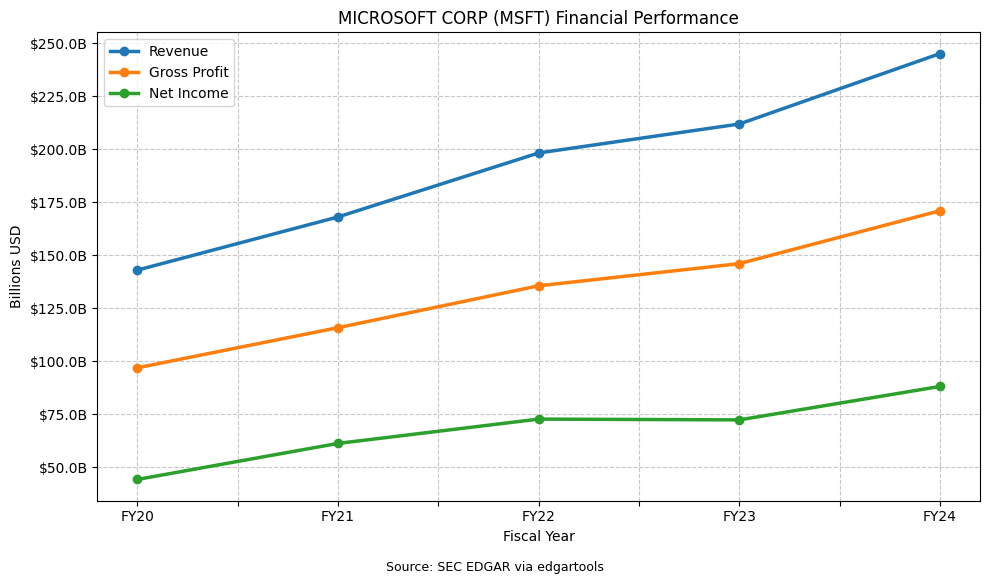

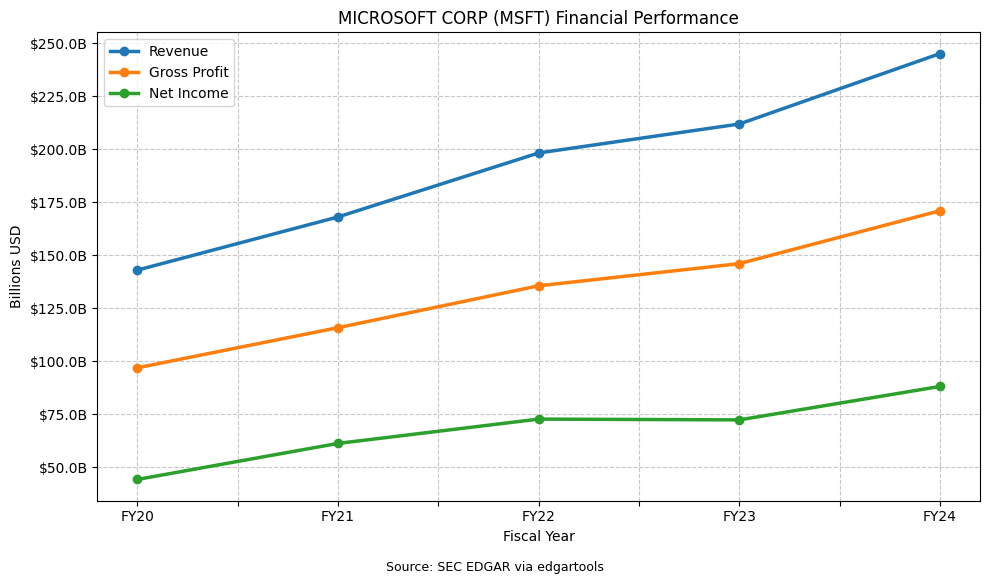

In [10]:
plot_revenue(ticker="MSFT")

In [45]:
# Import the necessary library from edgartools
import edgar

def get_company_revenue(company_name: str, year: int):
    """
    Fetches the total revenue for a given company and fiscal year from SEC filings.

    This function uses the edgartools library to find a company, retrieve its
    annual 10-K report, and parse the XBRL data to find the revenue.

    Args:
        company_name (str): The name of the company (e.g., "Apple", "Microsoft").
        year (int): The fiscal year for which to retrieve the revenue.

    Returns:
        int: The total revenue for the specified year.
        None: If the filing, data, or revenue fact cannot be found.
    """
    # The SEC requires a user-agent for all programmatic requests.
    # This should be set to your name and email.
    # Reference: https://edgartools.readthedocs.io/en/latest/readme.html#identity
    edgar.set_identity("rohilpal9763@gmail.com")

    try:
        # Find the company object. edgartools can look up the CIK from the name.
        # Reference: https://edgartools.readthedocs.io/en/latest/modules/core.html#edgartools.core.Company
        company = edgar.Company(company_name)

        # Get the annual report (10-K) for the specified fiscal year.
        annual_report = company.get_annual_report(year=year)

        if not annual_report:
            print(f"Could not find the annual report for {company_name} for the year {year}.")
            return None

        # Get the data object from the filing, which parses the XBRL.
        # Reference: https://edgartools.readthedocs.io/en/latest/modules/core.html#edgartools.core.Filing.obj
        data = annual_report.obj()
        if not data:
            print("Could not parse the filing data object.")
            return None

        # Get the financial facts from the parsed data.
        facts = data.get_facts()

        # The standard US-GAAP accounting term for revenue is 'Revenues'.
        revenue_fact = facts.get('us-gaap:Revenues')

        if revenue_fact:
            # The .value attribute gives the numerical value of the fact.
            return revenue_fact.value
        else:
            print(f"'Revenues' fact not found in the {year} report for {company_name}.")
            # Also try another common tag for revenue
            revenue_fact_alt = facts.get('us-gaap:SalesRevenueNet')
            if revenue_fact_alt:
                return revenue_fact_alt.value
            else:
                 print(f"'SalesRevenueNet' fact also not found.")
                 return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Example based on your query ---
if __name__ == "__main__":
    company = "Apple"
    fiscal_year = 2023 # Using 2023 for a valid example

    print(f"🔎 Attempting to fetch revenue for {company} for fiscal year {fiscal_year}...")
    
    # A note on timing: The 10-K report for fiscal year 2024 for a company like Apple,
    # whose fiscal year ends in September, is typically filed in October or November 2024.
    # Therefore, we are using the most recently completed year (2023) for this demonstration.
    revenue = get_company_revenue(company, fiscal_year)

    if revenue is not None:
        print(f"\n✅ Success!")
        print(f"The total revenue for {company} in fiscal year {fiscal_year} was: ${revenue:,}")
    else:
        print(f"\n❌ Failed to retrieve revenue for {company} for fiscal year {fiscal_year}.")

🔎 Attempting to fetch revenue for Apple for fiscal year 2023...
An error occurred: 'Company' object has no attribute 'get_annual_report'

❌ Failed to retrieve revenue for Apple for fiscal year 2023.
